In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

# Kernalized Support Vector Machine (a.k.a. SVM)

## linear model and non-linear feature
- One of the way to make linear model flexible is multiplication for the features or squared for the features to add new features.

Text(0, 0.5, 'feature 1')

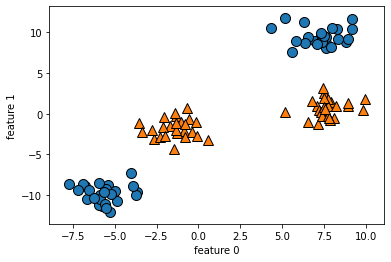

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature 1')

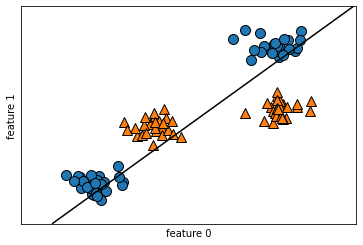

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

The binary classification dataset above cannot be classified by linear model 

- Now, we can expand the input features with adding "feature1 ** 2" for a new feature.
- Thus, we have 3-dimension data point with (feature 0, feature 1, feature 1 ** 2)

Text(0.5, 0, 'feature 2')

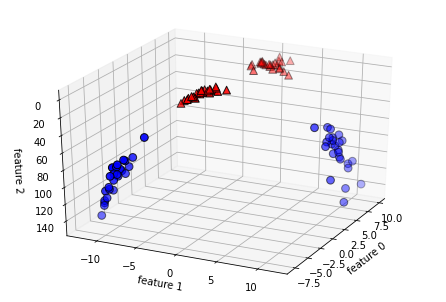

In [7]:
# adding a new feature with squaring the second feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3-Dimension graph
ax = Axes3D(figure, elev=-152, azim=-26)
# Draw the point that y == 0, and draw the poin that y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")

In the new dataset, we can separate it by two classes with linear model and the plane of 3-D space, So of course, let's check it out

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'feature 2')

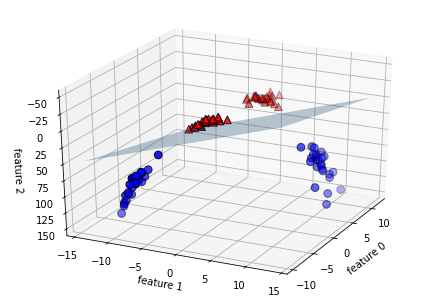

In [11]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# draw linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")

Text(0.5, 0, 'feature 1')

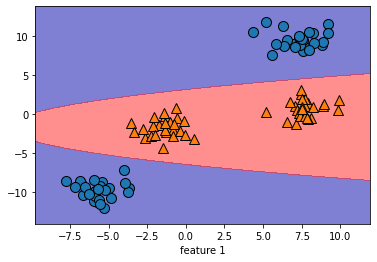

In [13]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.xlabel("feature 1")

## Kernel trick
- As we had above, adding non-linear feature to dataset, we made linear model strongly.
- But, in most cases, we don't know wich feature we can add and if we add lots of features (i.e. 100 features..), the calculation cost would be increased.
- Fortunately, there is a math trick that let classifier learn in high-dimension without over-making new features.
- This trick is called "Kernel Trick", without actually expanding data, it calculates the distance of data points ,which is scala product, about expanded features

### In SVM, There are two ways of mapping data to high-dimension.
- Polynomial Kernel : i.e.-> feature 1 ** 2 X feature 1 ** 5
- Radial Basis Function kernel (Gaussian kernel) : this is quite complicated but we can just understand that it considers all of the polynomial from all degree

## Understand of SVM

Text(0, 0.5, 'feature 1')

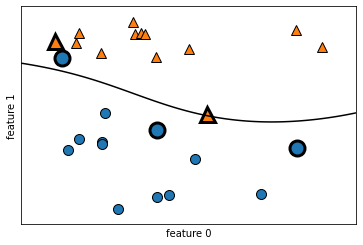

In [14]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# drawing data point
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#support vector
sv = svm.support_vectors_
#Class labels of support vector are defined by dual_coef_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## SVM parameter tunning
- gamma parameter is reciprocal of Gaussian kernel width
 - It decides the range of effection that one training sample affects.
 - small gamma means wide range, big one means narrow range.
 - which means that, The bigger Gaussian range, the bigger the effect range of training samples.
- C parameter is regularization paramerter as linear model uses. 
 - C parameter limits the importance of each point (dual_coef_)

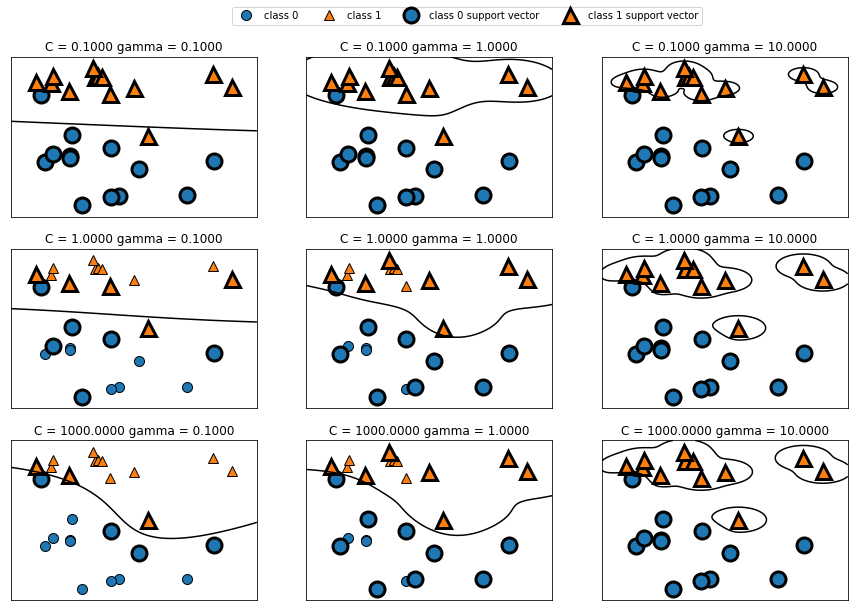

In [15]:
# we can look how different on amending each parameter
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector",
                  "class 1 support vector"], ncol=4, loc=(.9, 1.2))

In [20]:
# applying to cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(svc.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test, y_test)))

training set accuracy: 0.904
test set accuracy: 0.937


Text(0, 0.5, 'feature size')

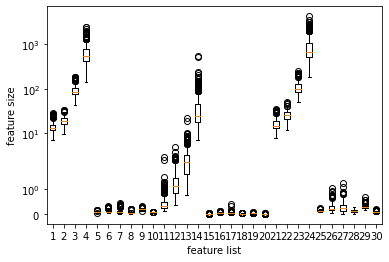

In [22]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature size")

As the graph above, features of the breast cancer dataset have way different digits. This can be problem in some models like linear model but in SVM, this is pretty big problem. How we solve it? 

## data pre-processing for SVM
- in this case, we can make all features' values have 0 average and unit varience or make them between 0 and 1


In [23]:
# calculating minimum of each features on training set
min_on_training = X_train.min(axis=0)
# calculating the range from max to min of each features on training set
range_on_training = (X_train - min_on_training).max(axis=0)

# (training data - minimum) / range -> max is 1, min is 0 for each features
X_train_scaled = (X_train - min_on_training) / range_on_training
print("minimum for each features: ", X_train_scaled.min(axis=0))
print("maximum for each features: ", X_train_scaled.max(axis=0))

minimum for each features:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximum for each features:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:
# we also use min and max on test set
X_test_scaled = (X_test - min_on_training) / range_on_training

In [26]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("training set accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

training set accuracy: 0.984
test set accuracy: 0.972


the performance got better and we can tune the parameters

In [27]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("training set accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

training set accuracy: 1.000
test set accuracy: 0.958
